# Problem

When exporting pictures from google photos, all pictures are linked to metadata (json files)

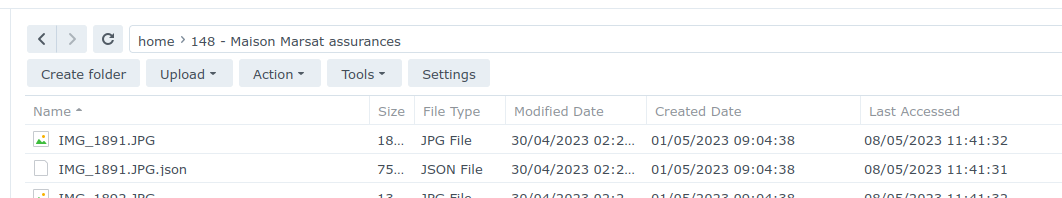

# photos directory structure

In [1]:
from fastcore.utils import Path
photos_directory=Path.home()/'Nas'/'home'/'Photos'/'148 - Maison Marsat assurances'
#photos_directory.ls(file_exts='.JPG')+photos_directory.ls(file_exts='.jpg')
photos_directory.ls()

(#150) [Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/@eaDir'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1891.JPG'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1891.JPG.json'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1892.JPG'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1892.JPG.json'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1893.JPG'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1893.JPG.json'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1894.JPG'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1894.JPG.json'),Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1895.JPG')...]

In [2]:
def return_extension_counts(path:Path):
    counter = {}
    for path_item in path.ls():
        if path_item.suffix in counter.keys():
            counter[path_item.suffix]+=1
        else:
            counter[path_item.suffix]=1
    return counter

In [3]:
return_extension_counts(photos_directory)

{'': 1, '.JPG': 74, '.json': 75}

4 different kind of files:

- pictures with '.JPG' suffix
- metadata associated with this picture '.json'
- metadata associated with the directory: `métadonnées.json`
- `@eaDir` directory which contains metadata + thumbnails for synology usage

# IMG_1891.JPG - data from json

In [4]:
photo_example = photos_directory/'IMG_1891.JPG'

In [5]:
assert photo_example.exists()

In [6]:
def get_metadata_files(path:Path):
    '''
    return path (Pathlib) to json file for this picture and json file to directory 
    '''
    assert path.exists(), f'picture file {path} not found'
    json_path = path.parent / (path.name + '.json')
    assert json_path.exists(), f"json file {json_path} not found"
    directory_json_path = path.parent / 'métadonnées.json'
    assert directory_json_path.exists, f"directory json file {directory_json_path} not found"
    return json_path, directory_json_path

In [7]:
get_metadata_files(photo_example)

(Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/IMG_1891.JPG.json'),
 Path('/home/guillaume/Nas/home/Photos/148 - Maison Marsat assurances/métadonnées.json'))

In [8]:
import json
def get_json_data(json_path:Path):
    with json_path.open(mode="r", encoding="utf-8") as json_file:
        return json.load(json_file)

In [9]:
get_json_data(get_metadata_files(photo_example)[0]), get_json_data(get_metadata_files(photo_example)[1])

({'title': 'IMG_1891.JPG',
  'description': '',
  'imageViews': '5',
  'creationTime': {'timestamp': '1260715884',
   'formatted': '13 déc. 2009, 14:51:24 UTC'},
  'photoTakenTime': {'timestamp': '1260522752',
   'formatted': '11 déc. 2009, 09:12:32 UTC'},
  'geoData': {'latitude': 0.0,
   'longitude': 0.0,
   'altitude': 0.0,
   'latitudeSpan': 0.0,
   'longitudeSpan': 0.0},
  'geoDataExif': {'latitude': 0.0,
   'longitude': 0.0,
   'altitude': 0.0,
   'latitudeSpan': 0.0,
   'longitudeSpan': 0.0},
  'url': 'https://lh3.googleusercontent.com/Id31SwsN2bGRdwGUOOhRG6uityr8gj9xT-c2UORttrd9TQiTeyAgokA0swJciBBlrT8ZP9cI-jYFiU1xSlr_lUMdBLqRL9iv2OTEcw',
  'googlePhotosOrigin': {'picasa': {}}},
 {'title': '148 - Maison Marsat assurances',
  'description': '',
  'access': 'private',
  'date': {'timestamp': '1242457200',
   'formatted': '16 mai 2009, 07:00:00 UTC'},
  'location': '',
  'geoData': {'latitude': 0.0,
   'longitude': 0.0,
   'altitude': 0.0,
   'latitudeSpan': 0.0,
   'longitudeSpan'

# IMG_1891.JPG - data from exif

In [10]:
from exif import Image

def get_exif_data(picture_path):
    with open(picture_path, 'rb') as picture_file:
        my_image = Image(picture_file)
        if(my_image.has_exif):
            print('Exif found')
            print(f'creation date {my_image.datetime}')
            return my_image.get_all()
        else:
            print('no exif')
            return False

In [11]:
get_exif_data(photo_example)

unable to read tag 'orientation'
unable to read tag 'components_configuration'
unable to read tag 'maker_note'
unable to read tag 'flashpix_version'
unable to read tag '_interoperability_ifd_Pointer'
unable to read tag 'file_source'


Exif found
creation date 2009:12:11 09:12:32


{'make': 'Canon',
 'model': 'Canon DIGITAL IXUS 70',
 'x_resolution': 180.0,
 'resolution_unit': <ResolutionUnit.INCHES: 2>,
 'y_resolution': 180.0,
 'software': 'Picasa 3.0',
 'datetime': '2009:12:11 09:12:32',
 'y_and_c_positioning': 1,
 '_exif_ifd_pointer': 210,
 'compression': 6,
 'jpeg_interchange_format': 3566,
 'jpeg_interchange_format_length': 5462,
 'exposure_time': 0.016666666666666666,
 'f_number': 2.8,
 'photographic_sensitivity': 200,
 'exif_version': '0220',
 'datetime_original': '2009:12:11 09:12:32',
 'datetime_digitized': '2009:12:11 09:12:32',
 'compressed_bits_per_pixel': 5.0,
 'shutter_speed_value': 5.90625,
 'aperture_value': 2.96875,
 'exposure_bias_value': 0.0,
 'max_aperture_value': 2.96875,
 'metering_mode': <MeteringMode.PATTERN: 5>,
 'flash': Flash(flash_fired=False, flash_return=FlashReturn.STROBE_RETURN_LIGHT_DETECTED, flash_mode=FlashMode.AUTO_MODE, flash_function_not_present=False, red_eye_reduction_supported=False, reserved=1),
 'focal_length': 5.8,
 'us

# class google_picture

In [12]:
import warnings
warnings.filterwarnings('error')

In [52]:
import exif
import filedate
import datetime
from datetime import datetime
import re
from dateutil.parser import parse

class GooglePicture:
    '''
    this represents a picture from google photos
    '''
    
    def __init__(self,
                 filepath:Path #full filepath in Pathlib format)
                ):
        assert filepath.exists, f'cannot create non existing picture {filepath}'
        self.fullfilename = filepath
        self.directoryname = filepath.parent
        self.extension = filepath.suffix
        self.filename = filepath.name
        self.json_fullfilename = filepath.parent / (filepath.name + '.json')
        self.date = None
        self.description = ''
        self.date_filecreationdate = None
        self.date_filename = None
        self.date_exif = None
        self.date_google = None
        
        self.get_dates()
        
    def __str__(self):
        return f'{self.filename}, {self.extension}, {self.date}'
    
    def has_exif(self):
        with open(self.fullfilename, 'rb') as picture_file:
            my_image = exif.Image(picture_file)
            return my_image.has_exif
        
    def has_json(self):
        return self.json_fullfilename.exists()
    
    def get_dates(self):
        '''
        we detect date from file creation date, exif, google, filename
        then set date with this rule:
        - if exif is set, this is the truth
        - then google
        - then filename (if YYYYMMDD in filename)
        - then file creation date
        '''
        # from file
        file_Date = filedate.File(str(self.fullfilename))
        filename_date = file_Date.get()['created']
        filename_date = filename_date.strftime("%Y:%m:%d %H:%M:%S")#  2009:12:11 09:12:32
        #print(f'filedate: {filename_date}')
        self.date_filecreationdate = filename_date
        if self.has_exif():
            with open(self.fullfilename, 'rb') as picture_file:
                my_image = exif.Image(picture_file)
                assert 'datetime' in my_image.get_all().keys()
                exif_date = my_image.get('datetime')
                #print(f'exifdate: {exif_date}')
                self.date_exif = exif_date
        if self.has_json():
            with self.json_fullfilename.open(mode="r", encoding="utf-8") as json_file:
                json_content = json.load(json_file)
                assert 'photoTakenTime' in json_content.keys()
                google_date = datetime.fromtimestamp(int(json_content['photoTakenTime']['timestamp']))
                google_date = google_date.strftime("%Y:%m:%d %H:%M:%S")
                #print(f'googledate: {google_date}')
                self.date_google = google_date
        try:
            regex = re.sub(
                r"\D",
                " ",
                Path(self.fullfilename).stem
            ).strip()
            self.date_filename = parse(regex).timestamp()
        except ValueError:
            self.date_filename = None
            raise ValueError(f"Parsed string {Path(self.fullfilename).stem} does not contain a date")
                
        
        
        if self.date_exif is not None:
            self.date = self.date_exif
        else:
            if self.date_google is not None:
                self.date = self.date_google
            else:
                if self.date_filename is not None:
                    self.date = self.date_filename
                else:
                    if self.date_filecreationdate is not None:
                        self.date = self.date_filecreationdate
        
        
    def print_dates(self):
        print(f'Date: {self.date}')
        print(f'  Date exif: {self.date_exif}')
        print(f'  Date google: {self.date_google}')
        print(f'  Date filename: {self.date_filename}')
        print(f'  Date file creation date: {self.date_filecreationdate}')

            
                

        

In [53]:
gp_example = GooglePicture(photo_example)
print(gp_example)

unable to read tag 'orientation'
unable to read tag 'components_configuration'
unable to read tag 'maker_note'
unable to read tag 'flashpix_version'
unable to read tag '_interoperability_ifd_Pointer'
unable to read tag 'file_source'


IMG_1891.JPG, .JPG, 2009:12:11 09:12:32


In [54]:
gp_example.print_dates()

Date: 2009:12:11 09:12:32
  Date exif: 2009:12:11 09:12:32
  Date google: 2009:12:11 10:12:32
  Date filename: -2482013361.0
  Date file creation date: 2023:05:08 16:05:37


In [55]:
gp_example2 = GooglePicture(photos_directory/'IMG_1891_20210324.JPG')

unable to read tag 'orientation'
unable to read tag 'components_configuration'
unable to read tag 'maker_note'
unable to read tag 'flashpix_version'
unable to read tag '_interoperability_ifd_Pointer'
unable to read tag 'file_source'


ValueError: Parsed string IMG_1891_20210324 does not contain a date